In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')



In [72]:
df = pd.read_csv("Mall_Customers.csv")


In [73]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [74]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


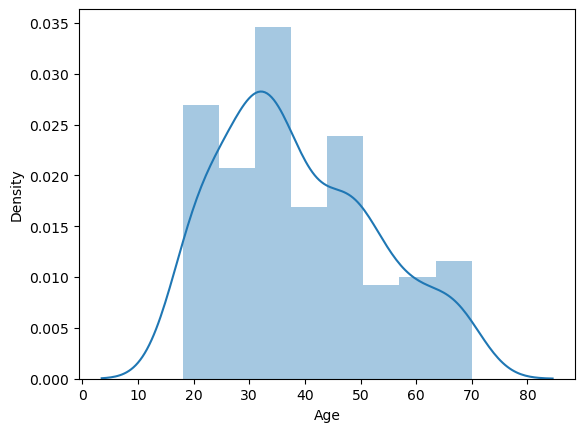

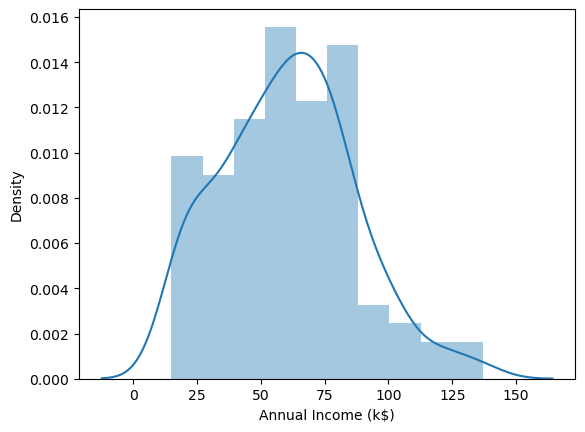

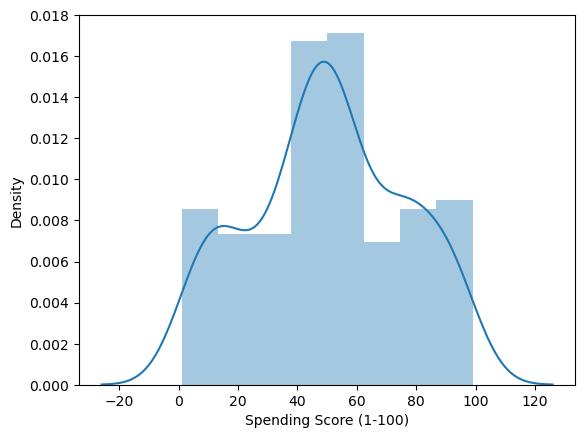

In [124]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

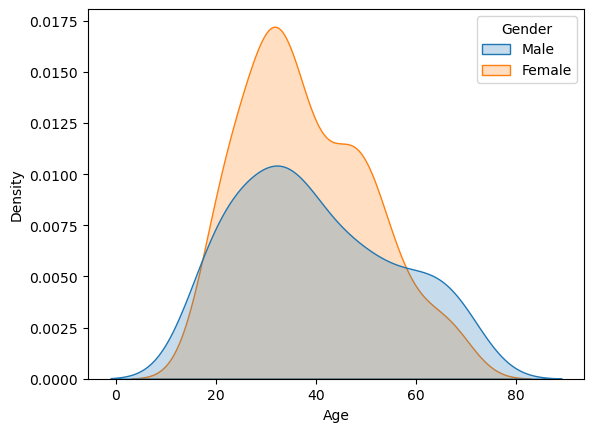

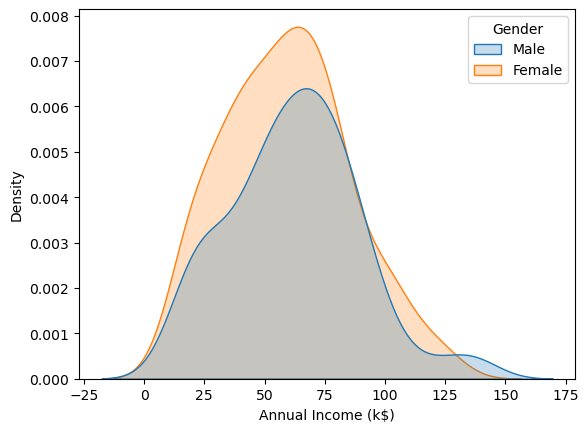

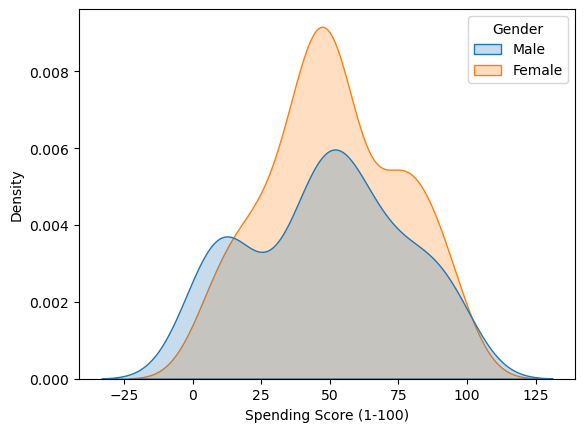

In [125]:
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, shade=True, hue='Gender')

In [126]:
df['Gender'].value_counts(normalize=True)


Female    0.56
Male      0.44
Name: Gender, dtype: float64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

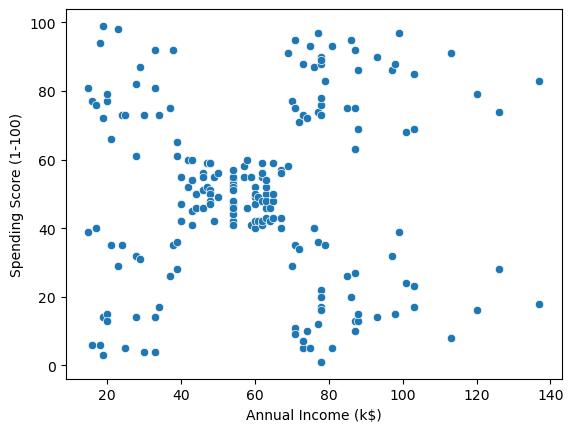

In [127]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')


In [128]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

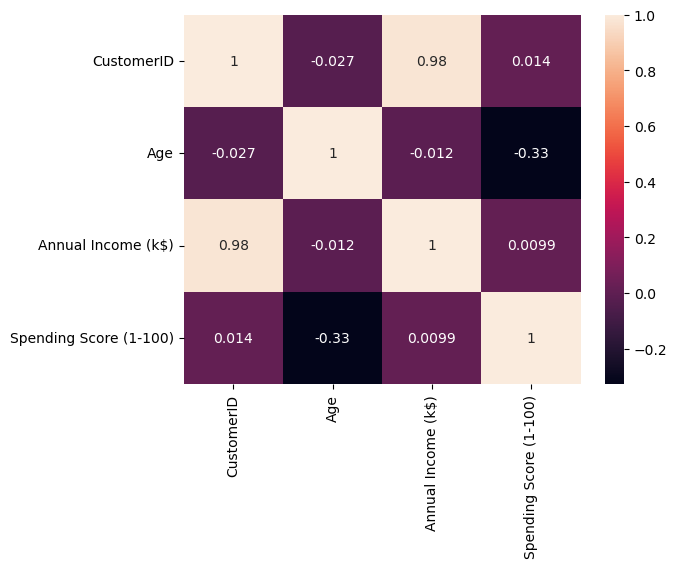

In [129]:
df.corr()
sns.heatmap(df.corr(), annot=True)

In [130]:
clustering1 = KMeans(n_clusters=3)
clustering1.fit(df[['Annual Income (k$)']])
df['Income Cluster'] = clustering1.labels_

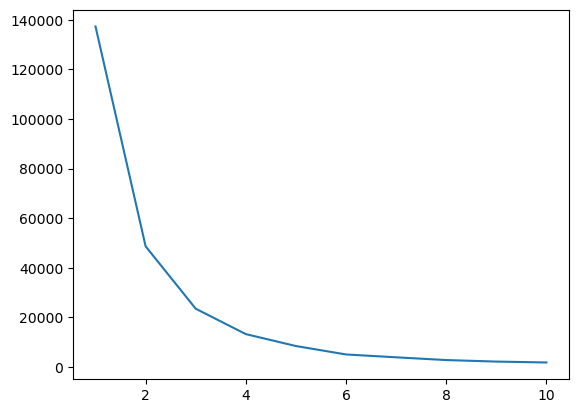

In [131]:
clustering1 = KMeans(n_clusters=3)


In [132]:
df['Income Cluster'].value_counts()


2    90
1    74
0    36
Name: Income Cluster, dtype: int64

In [133]:
clustering1.inertia_


23517.330930930926

In [134]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


In [135]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_

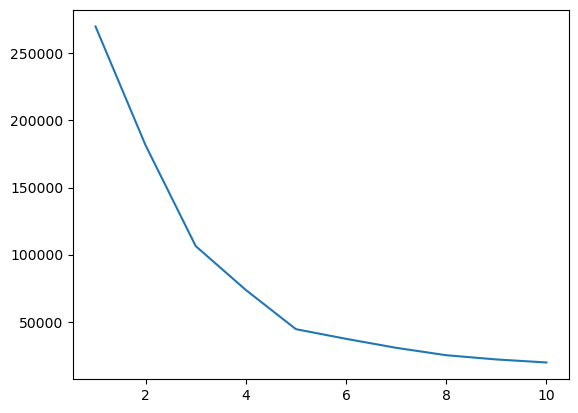

In [136]:
intertia_scores2=[]
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)

plt.plot(range(1, 11), intertia_scores2)

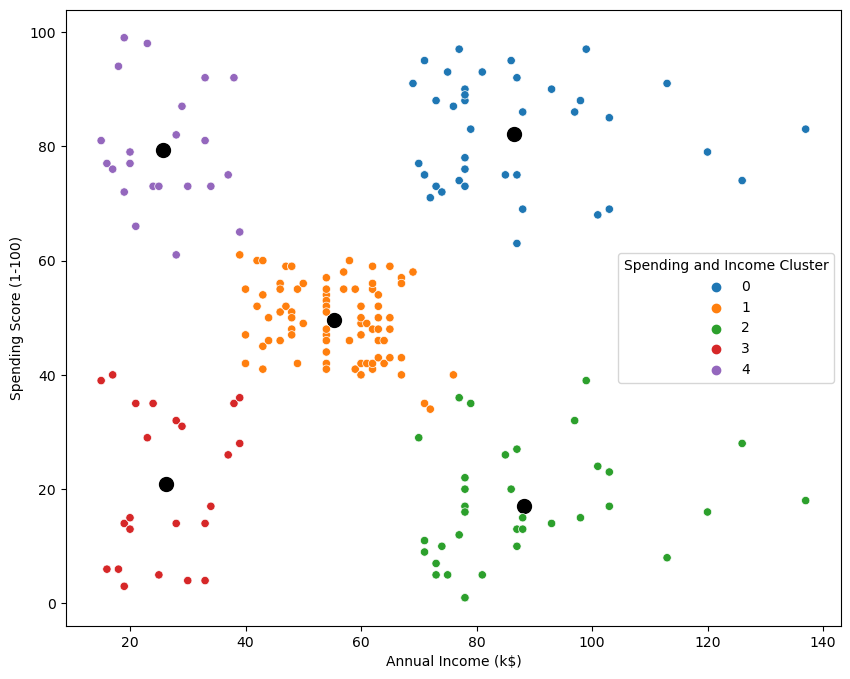

In [137]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

plt.figure(figsize=(10, 8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [141]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


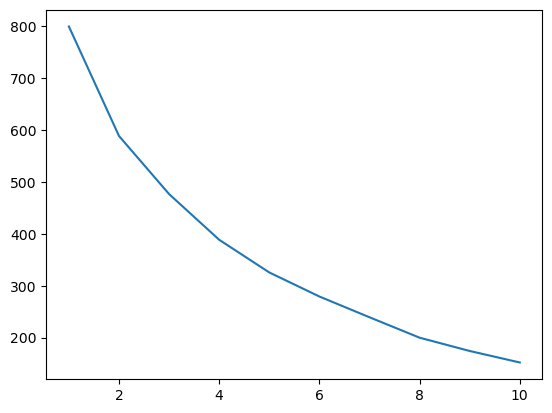

In [142]:
scale = StandardScaler()
dff = pd.get_dummies(df, drop_first=True)
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff = scale.fit_transform(dff)

intertia_scores3=[]
for i in range(1, 11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)

plt.plot(range(1, 11), intertia_scores3)